In [7]:
import pandas as pd
df=pd.read_csv("student_data_50.csv")
df

,ID,Name,StudyHours,Attendance,Assignments,Result
0,1,Amit,2.5,70,1,Pass
1,2,Bhavna,1.0,65,0,Fail
2,3,Chetan,4.0,90,1,Pass
3,4,Divya,3.2,80,1,Pass
4,5,Esha,1.5,60,0,Fail
5,6,Farhan,3.8,88,1,Pass
6,7,Geeta,0.5,50,0,Fail
7,8,Hiren,2.0,72,1,Pass
8,9,Isha,4.5,95,1,Pass
9,10,Jatin,1.2,68,0,Fail


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()
df['Result']=le.fit_transform(df['Result'])
x=df.drop(['Result','Name','ID'],axis=1)
y=df['Result']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("X_train:-\n",x_train)
print("Y_train:-\n",y_train)

X_train:-
     StudyHours  Attendance  Assignments
12         1.8          60            0
4          1.5          60            0
37         2.2          72            1
8          4.5          95            1
3          3.2          80            1
6          0.5          50            0
41         1.2          60            0
46         1.3          60            0
47         2.4          71            1
15         4.5          92            1
9          1.2          68            0
16         1.0          58            0
24         1.1          59            0
34         0.8          57            0
31         1.7          64            0
0          2.5          70            1
44         0.6          53            0
27         2.5          73            1
33         3.6          83            1
5          3.8          88            1
29         1.3          62            0
11         2.3          65            1
36         1.6          61            0
1          1.0          65   

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
from sklearn.metrics import accuracy_score,classification_report
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print("prediction:-",y_pred)
print("\nactual result:-",y_test.values)
print("\naccuary of model:-",accuracy_score(y_test,y_pred))
print("\nclassification report:-",classification_report(y_test,y_pred))

prediction:- [1 0 1 1 1 1 0 1 1 0]

actual result:- [1 0 1 1 1 1 0 1 1 0]

accuary of model:- 1.0

classification report:-               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



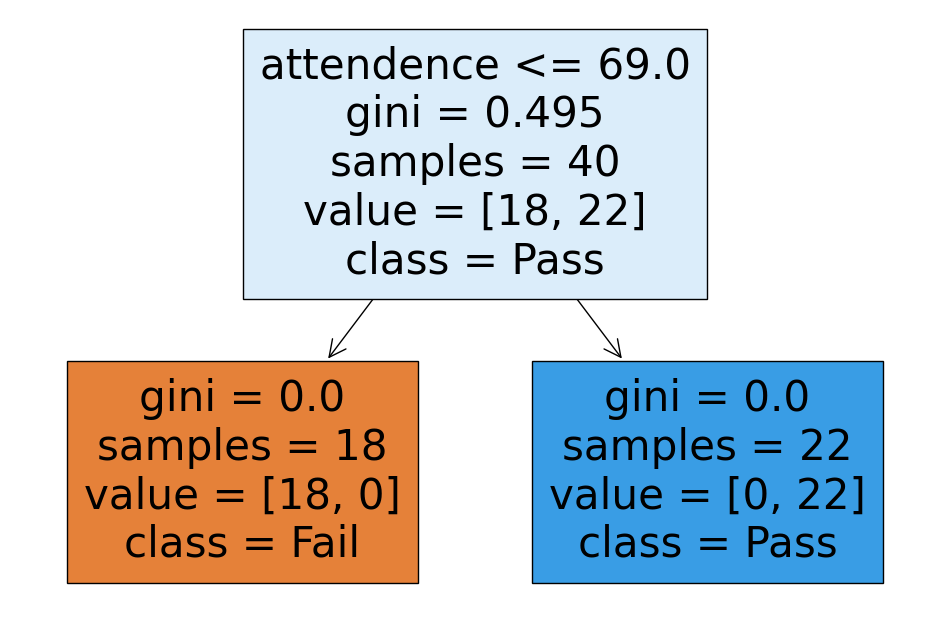

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=['studyhours', 'attendence', 'assignment'], class_names=['Fail', 'Pass'], filled=True)
plt.show()


In [19]:
# Load new data (without Result column)
new_data = pd.read_csv("unseen_test_data.csv")  # or define manually
X_new = new_data[['StudyHours', 'Attendance', 'Assignments']]


In [25]:
predictions = model.predict(X_new)
print(predictions)


[1 0 1 1 0 1 0 1 1 0]


In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [1.  0.9 1.  1.  1. ]
Average Accuracy: 0.9800000000000001
